In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=8286a559e4ade278a36a8d9dabf03cc647289e74c1477b47f5be3e31c38a58d5
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Question 1a)

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)

Silhouette Score for k = 2 is 0.7872281904585385
Silhouette Score for k = 3 is 0.7482611209321568
Silhouette Score for k = 4 is 0.7242798876964539
Silhouette Score for k = 5 is 0.7096291968118152
Silhouette Score for k = 6 is 0.6994193012271033
Silhouette Score for k = 7 is 0.6917386067723421
Silhouette Score for k = 8 is 0.6812504790787621
Silhouette Score for k = 9 is 0.6748327276043632
Silhouette Score for k = 10 is 0.6632452987037495



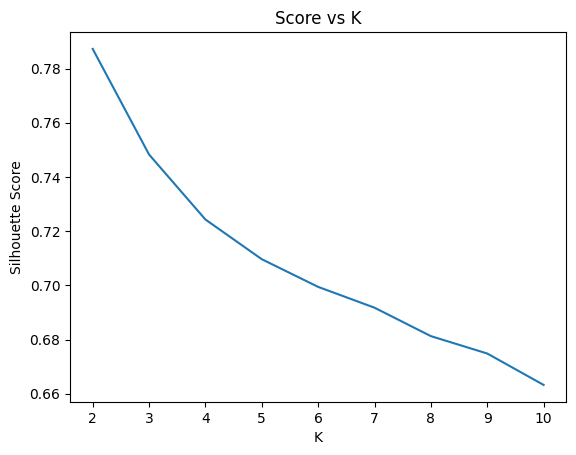

In [5]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt

# Create a SparkSession object
# Load the dataset into a Spark DataFrame with the defined schema
spark = SparkSession.builder.appName("Clustering using K-Means").getOrCreate()
data = spark.read.csv('/content/drive/MyDrive/UTD/2023 Spring/BigData/HW4/Iris.csv', header=True, inferSchema=True)
data.printSchema()

# Assemble feature columns into a single vector column
featurecol = data.columns[:-1]
assemble = VectorAssembler(inputCols=featurecol, outputCol="features")
assembled_data = assemble.transform(data)

# Scale the features using StandardScaler
scale = StandardScaler(inputCol='features',outputCol='scaled')
scale_model = scale.fit(assembled_data)
scale_model_output = scale_model.transform(assembled_data)

silhouette_score = []
evaluator = ClusteringEvaluator()

# Perform K-means clustering for k ranging from 2 to 10
for i in range(2,11):

    Kmeans = KMeans(k=i, seed = 1)
    KMeans_fit = Kmeans.fit(scale_model_output)
    predictions = KMeans_fit.transform(scale_model_output)

    score = evaluator.evaluate(predictions)
    silhouette_score.append(score)
    print("Silhouette Score for k = " + str(i) + " is " + str(score))

print()

# Plot the Score vs K graph
plt.plot(range(2,11), silhouette_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Score vs K')
plt.show()

In [6]:
#Question 1b)

In [7]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.clustering import GaussianMixture

k = 2

#K-Means Model
kmeans = KMeans(k = k, seed = 1)
kmeans_model = kmeans.fit(scale_model_output)
kmeans_output = kmeans_model.transform(scale_model_output)

kmeans_evaluator = ClusteringEvaluator()
kmeans_score = kmeans_evaluator.evaluate(kmeans_output)
print("K-means silhouette score for k = " + str(k) + " is " + str(kmeans_score))


#GMM Model
gmm = GaussianMixture(k = k, seed = 1)
gmm_model = gmm.fit(scale_model_output)
gmm_output = gmm_model.transform(scale_model_output)

gmm_evaluator = ClusteringEvaluator()
gmm_score = gmm_evaluator.evaluate(gmm_output)
print("GMM silhouette score for k = " + str(k) + " is " + str(gmm_score))

K-means silhouette score for k = 2 is 0.7872281904585385
GMM silhouette score for k = 2 is 0.6752702690960161
